Title: Milestone4_Vayuvegula_Soma_Shekar

Author: Soma Shekar Vayuvegula

Professor: Andrew Hua

Date: 02/12/2023

# Import required libraries

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score

# Read data from file

In [3]:
df_pred = pd.read_csv("breast_cancer_pred.csv")
df_pred.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Visualize the data

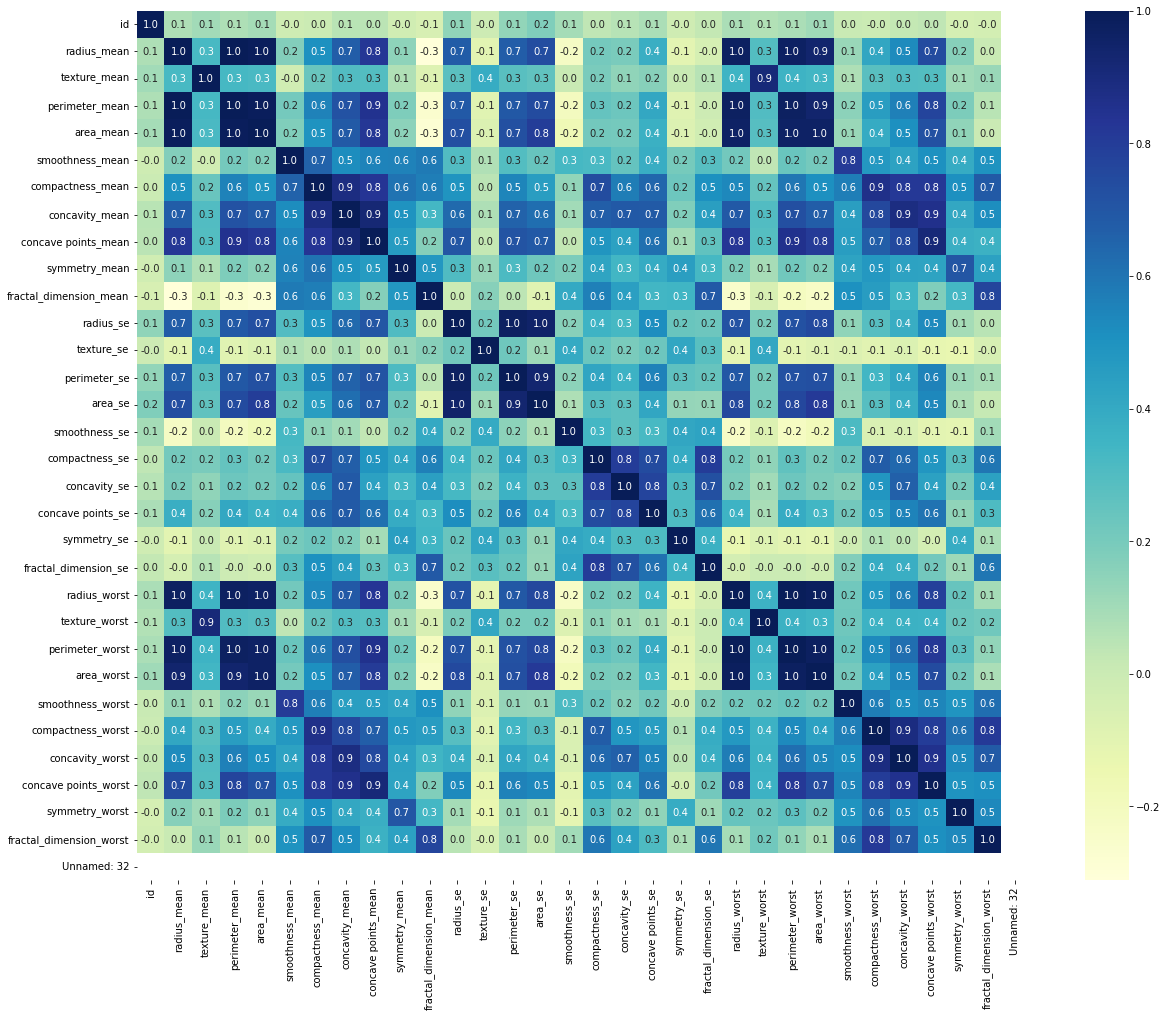

In [4]:
corr = df_pred.corr()
fig = plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True,
            cmap='YlGnBu',
            fmt=".1f")
plt.show()

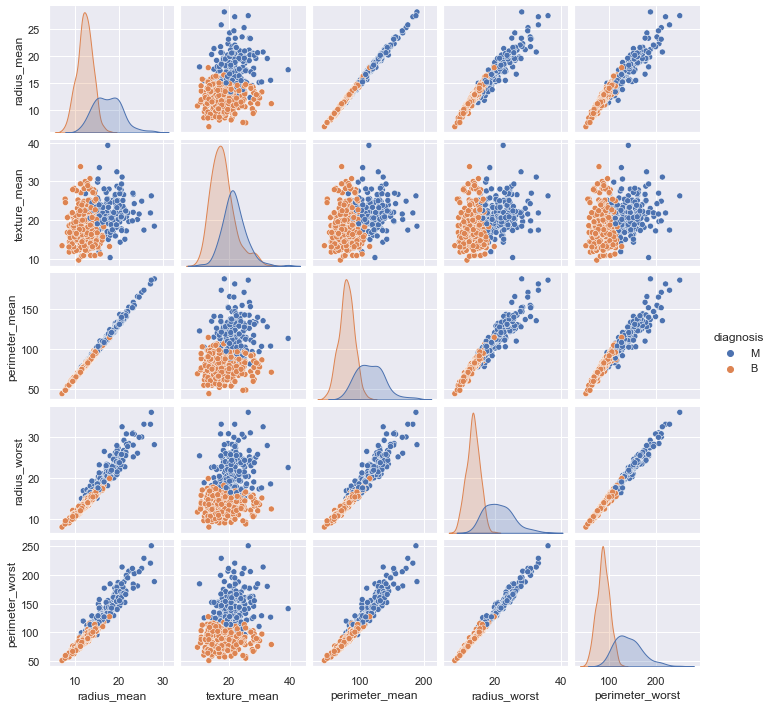

In [5]:
sns.set(font_scale=1)
sns.pairplot(df_pred, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "radius_worst", "perimeter_worst"], size = 2)

# Data Cleansing and Transformation

As part of Data Cleansing and transformation, I am doing the following:
    
    1. Drop columns - id and Unnamed:32 as they are not required for our model building and analysis
    2. Convert diagnosis from string to int and transform values M and B as 1 and 0 respectively.

## Drop Columns

In [6]:
df_pred = df_pred.drop(["id","Unnamed: 32"],axis=1)

In [7]:
df_pred.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Transform data

In [8]:
df_pred.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)

In [9]:
df_pred.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Identify and drop NaN values

In [10]:
df_pred.isna().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

# Data preprocessing

In [11]:
corr = df_pred.corr()
# Get value of correlation 
corr_values = abs(corr["diagnosis"])
# Select highly correlated features 
relevant_features = corr_values[corr_values>0.2]
relevant_features = list(relevant_features.index)
relevant_features.remove('diagnosis')


# Split into input and output data

In [12]:
X = np.array(df_pred.iloc[:, 1:])
y = np.array(df_pred['diagnosis'])

In [13]:
# Transform features by scaling each feature to a given range
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Check data imbalance and apply SMOTE

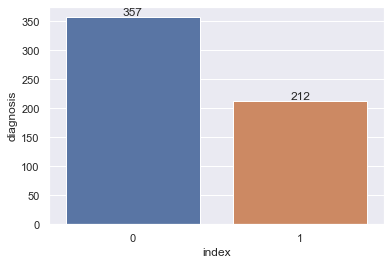

In [14]:
xx = df_pred['diagnosis'].value_counts().reset_index()
ax = sns.barplot(x="index",y="diagnosis",data=xx)
for i in ax.containers:
    ax.bar_label(i,)

As ratio of Malignant and Benign tumors are 60:40, I have applied SMOTE to get the balanced data set and get the prediction right. In general, if one diagnosis value has more rows than other, predictions will be more towards diagnosis which has more rows.

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

# Splitting to train and test datasets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42)

# Logistic Regression

In [17]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Intialize the model
log_model = LogisticRegression()

log_model_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, .009, 0.01, .09, 1, 5, 10, 25],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
}

grid_search_log = GridSearchCV(estimator=log_model,
                               param_grid=log_model_params,
                               cv=cv,
                               verbose=1,
                               scoring='roc_auc',
                               error_score=0)

grid_result_log = grid_search_log.fit(X_train, y_train)
grid_result_log.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'C': 5, 'penalty': 'l2', 'solver': 'saga'}

In [18]:
# Model training and scoring

log_model = log_model.set_params(**grid_result_log.best_params_)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_log)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_log)}')

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       113
           1       0.97      0.96      0.97       102

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215

[[110   3]
 [  4  98]]
ROC-AUC score : 0.9671178205795593
Accuracy score : 0.9674418604651163


In [19]:
print(classification_report(y_pred_log,y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       114
           1       0.96      0.97      0.97       101

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215



# KNN Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

#Initialize KNN model
knn = KNeighborsClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Setting params for knn model
knn_params = {
    'n_neighbors': range(1, 15, 2),
    'weights': ['iniform', 'distance'],
    'metric': ['cosine'],
    'leaf_size': [1, 50, 5]
}

#Initializing Grid Search KNN
grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=knn_params,
                               cv=cv,
                               verbose=1,
                               scoring='roc_auc')

# Fit the model
grid_result_knn = grid_search_knn.fit(X_train, y_train)
grid_result_knn.best_params_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


{'leaf_size': 1, 'metric': 'cosine', 'n_neighbors': 5, 'weights': 'distance'}

In [21]:
# Model training and scoring
knn = knn.set_params(**grid_result_knn.best_params_)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_knn)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_knn)}')

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       113
           1       0.93      0.98      0.96       102

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215

[[106   7]
 [  2 100]]
ROC-AUC score : 0.9592226271039389
Accuracy score : 0.958139534883721


In [22]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       108
           1       0.98      0.93      0.96       107

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



# Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred_dtc = clf.predict(X_test)

print(classification_report(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_dtc)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_dtc)}')

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       113
           1       0.92      0.95      0.94       102

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215

[[105   8]
 [  5  97]]
ROC-AUC score : 0.9400919659899357
Accuracy score : 0.9395348837209302


In [24]:
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       110
           1       0.95      0.92      0.94       105

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215



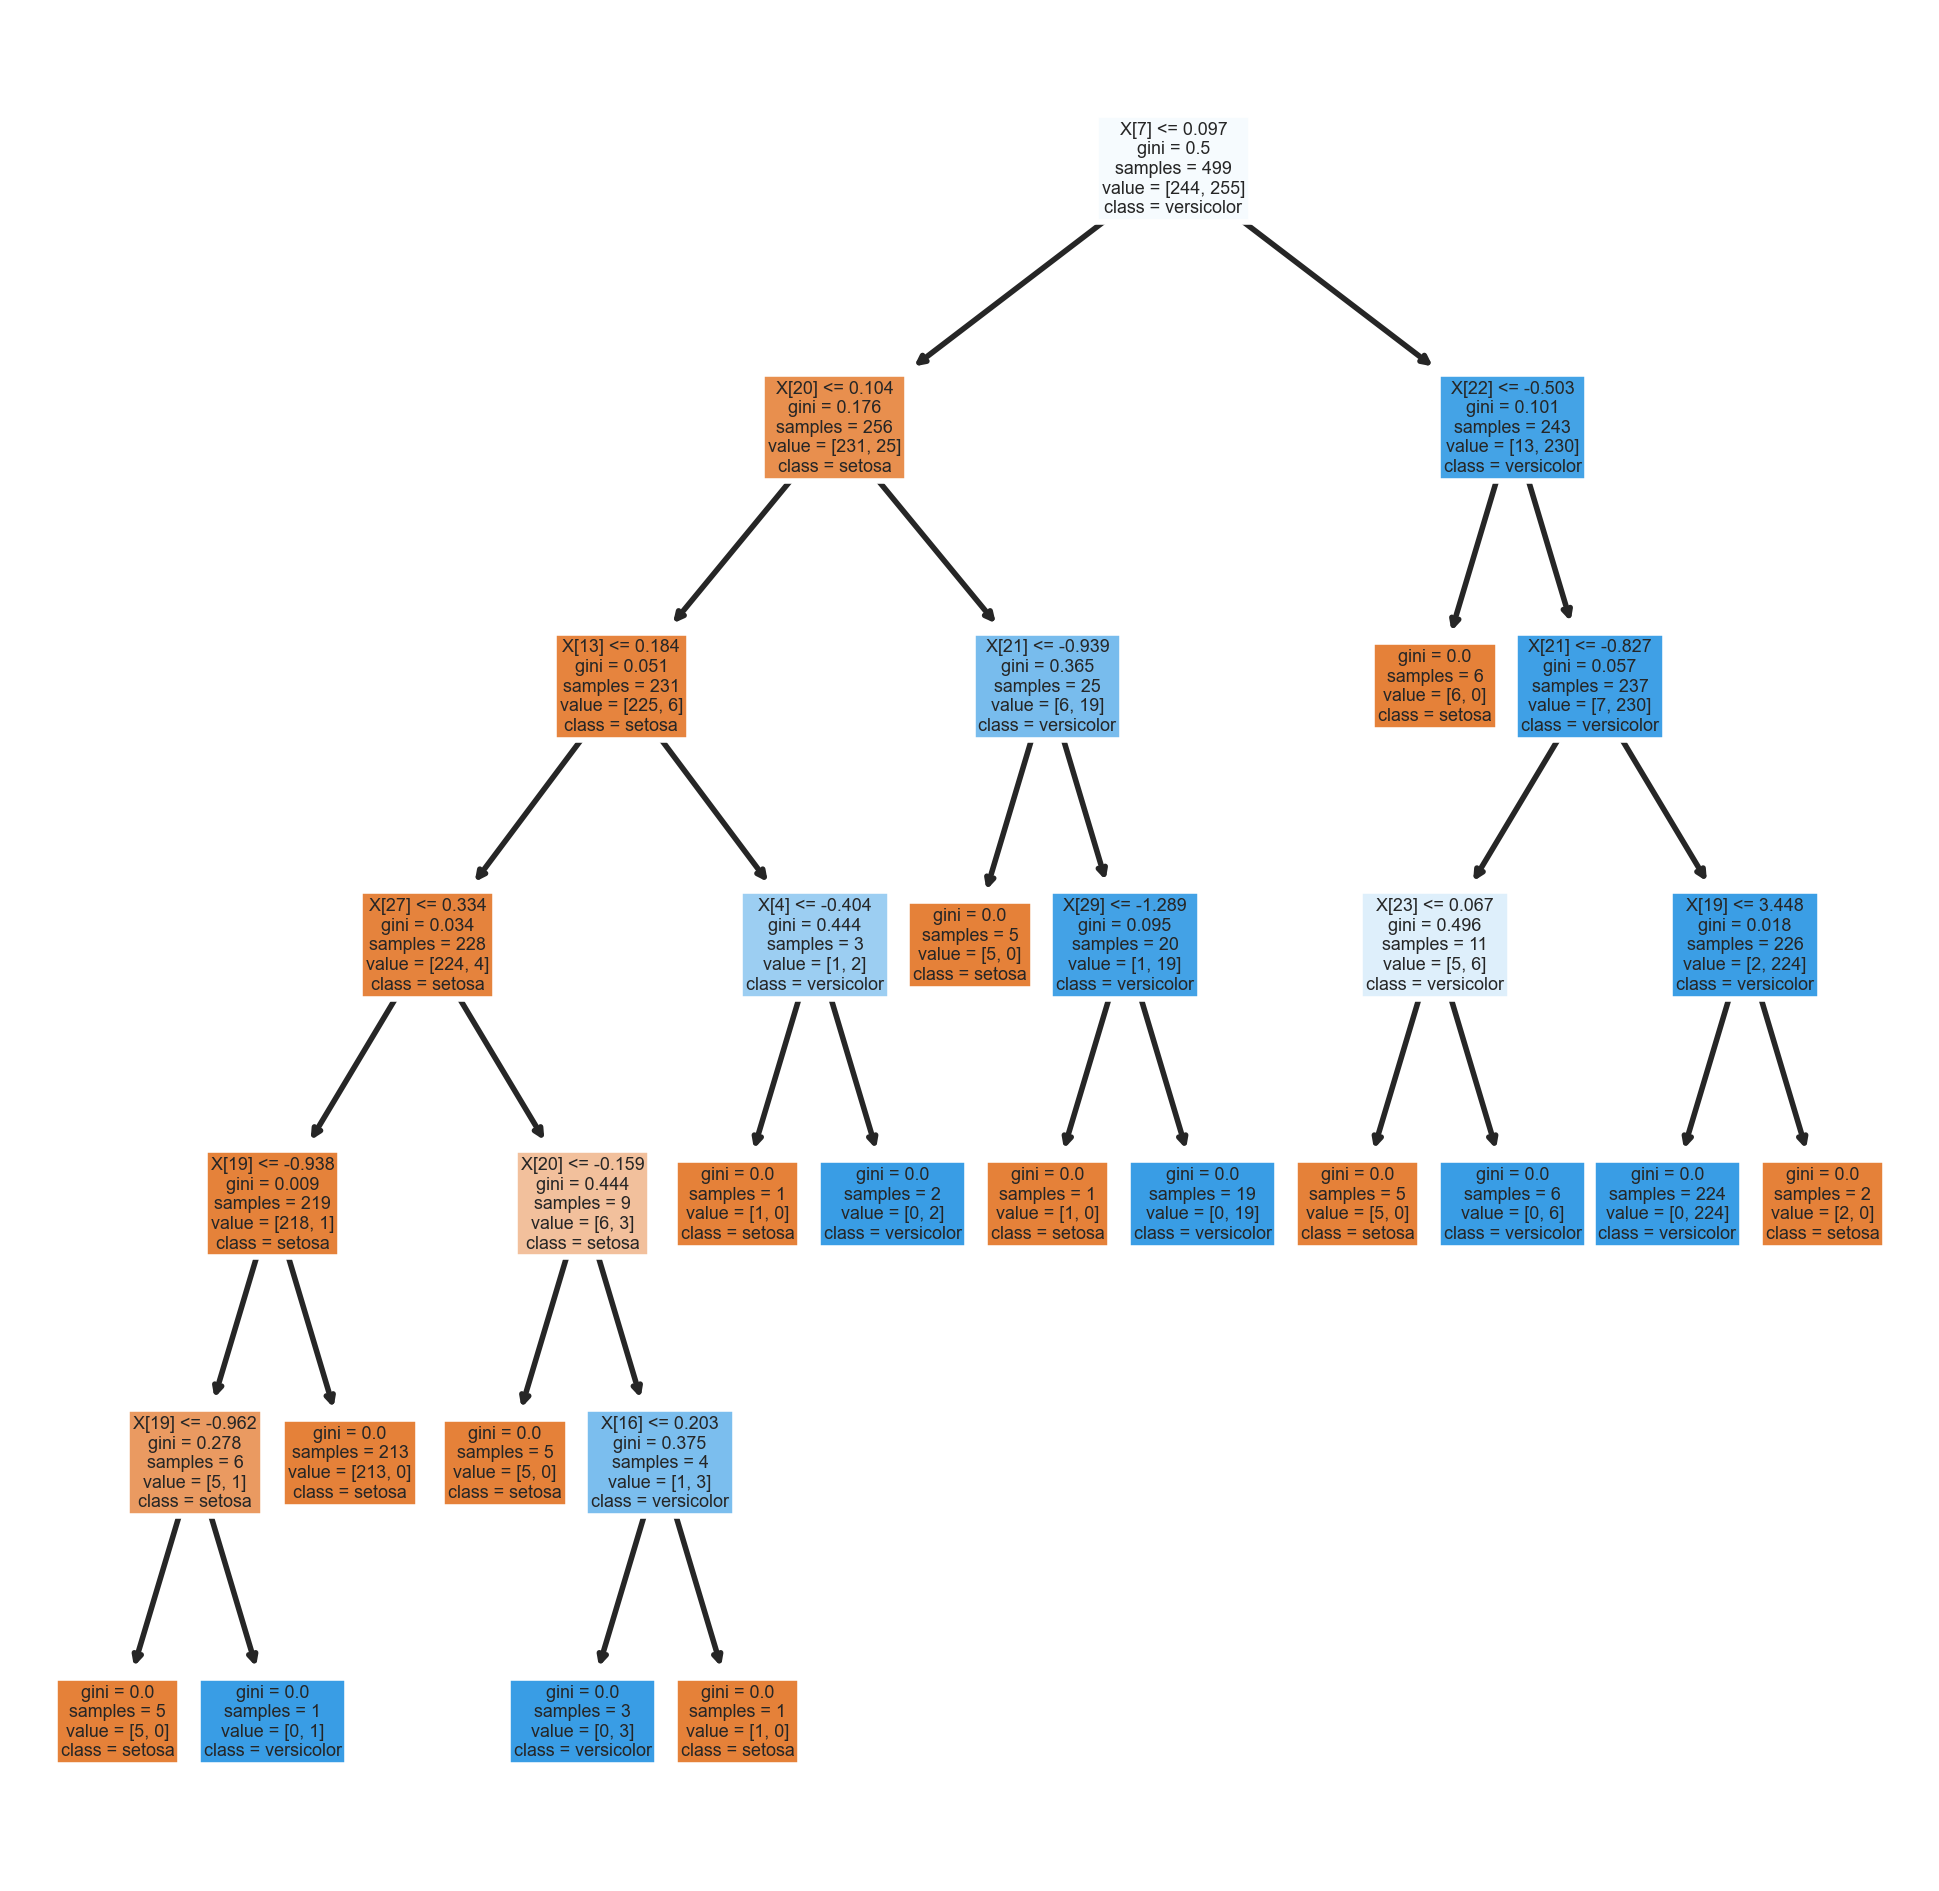

In [25]:
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=400)
tree.plot_tree(clf,
               class_names=cn,
               filled = True);
fig.savefig('dtc.png')

# Random Forrest

In [26]:
# Importing the model:
from sklearn.ensemble import RandomForestClassifier

# Initiating the model:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred_dtc = rf.predict(X_test)

print(classification_report(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_dtc)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_dtc)}')

#scores = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
#print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       113
           1       0.96      0.97      0.97       102

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215

[[109   4]
 [  3  99]]
ROC-AUC score : 0.9675950026028111
Accuracy score : 0.9674418604651163


# Interpret Results:

I have implemented 3 models i.e., KNN Model, Logistic Regression and Decision Tree. 
I have implemented three models to compare which model is performing the best amongst them.

On comparison, though there is no much difference, Logistic Regression model is the best with Accuracy score of 0.9767441860465116.

Other two models i.e., KNN Model and Decision Tree Classifier have the same Accuracy score of 0.9627906976744186.

I felt that the dataset was not balanced so have implemented SMOTE to get the balanced data.

# Begin to formulate a conclusion/recommendations

My goal was to test different models to get the best results. I have collected different datasets with different formats but was able to use dataset of one format.

I have implemented three different models to check which model suits better. Of all the implemented models, Logistic Regresion is better.

However, due to time constraint, I was not able to build models for those datasets. 
If time permits, I would have built models for different datasets of if there is a possibility, I would like to merge them into larger datasets and implements the models.

As for recommendations, my plan is to implement a system to predict cancer with different symptoms so that it will be useful to general public.
I want to build Self test tracker to test by self.

I would have liked to get dataset with different stages of cancer and predict the stage of cancer with different symptoms.

Also, would like to build a proper decision tree for different stages of cancer.

# Resources

Kaggle. (n.d.). breast_cancer_detection (November 2022). www.kaggle.com. Retrieved December 11, 2022,from https://www.kaggle.com/code/architkuiya/breast-cancer-detection/data